## KNN算法（朴素）

优先队列保存前 k 个数据点

大根堆

### 1. 导入相关包

In [1]:
from data_structure import *
import numpy as np
import matplotlib.pyplot as plt

### 2. 优先队列的节点

In [2]:
class Node:
    def __init__(self, x=None, val=None):
        self.x = x
        self.val = val
    def value(self):
        return self.val

### 3. 构造数据集

便于显示，就用二维的数据

In [3]:
nums = 65
k = 12
T_1 = np.random.randn(nums, 2) * 12 + 12
T_2 = np.random.randn(nums, 2) * 12 + -12
T = np.vstack((T_1, T_2))
y_1 = np.ones([nums, 1]) * 0
y_2 = np.ones([nums, 1]) * 1
y = np.vstack((y_1, y_2))

# 要分类的点
X = np.array([5, 5])

### 4. KNN 算法

In [4]:
# 大根堆（最远的去掉）
que = PriorityQueue(is_ascend=False)
for item in T:
    node = Node(item, np.sum(np.square(item - X)))
    if que.size < k:
        que.push(node)
    elif que.top().value() > node.value():
        que.pop()
        que.push(node)

# 邻居
nbs_2 = []
R_2 = np.sqrt(que.top().value())
while que.size:
    nbs_2.append(que.pop().x)
nbs_2 = np.array(nbs_2)

### 5. 可视化

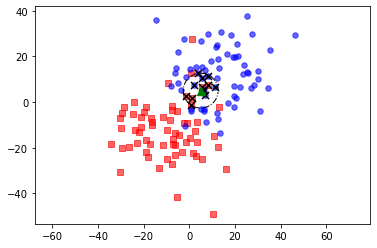

In [5]:
T_p = []
T_n = []
for x, label in zip(T, y):
    if label == 1:
        T_p.append(x)
    else:
        T_n.append(x)
T_p = np.array(T_p)
T_n = np.array(T_n)

plt.axes().set_aspect('equal', adjustable='datalim')
# 正负类（也可以多类）
plt.scatter(T_p[:, 0], T_p[:, 1], c='r', marker='s', alpha=0.6, s=30)
plt.scatter(T_n[:, 0], T_n[:, 1], c='b', marker='o', alpha=0.6, s=30)
plt.scatter(nbs_2[:, 0], nbs_2[:, 1], c='k', marker='x', s=50)
plt.scatter(X[0], X[1], c='g', marker='^', s=70)
# KNs的范围
t = np.arange(0, 2 * np.pi, 0.1)
circle_x = np.cos(t) * R_2 + X[0]
circle_y = np.sin(t) * R_2 + X[1]
plt.plot(circle_x, circle_y, 'k-.', linewidth=1)
plt.show()